全市场主动卖出成交额占比 均值

In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort('symbol')

df = df.with_columns([
    (pl.col('quote_volume') - pl.col('taker_buy_quote_volume')).alias('diff'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

# 计算每个时刻所有 symbol 的 taker_buy_quote_volume 的总和
df = df.with_columns([
    pl.col("diff").sum().over("open_time").alias("total_diff_volume")
])

# 计算每个 symbol 在每个时刻的 taker_buy_quote_volume 与总和的比例
df = df.with_columns([
    (pl.col("diff") / pl.col("total_diff_volume")).alias("diff_ratio_perday")
])

df

open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,diff,return,total_diff_volume,diff_ratio_perday
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64,f64,f64
2023-11-22 00:00:00,0.00478,0.004825,0.004076,0.004531,1.2701e10,2023-11-22 23:59:59.999,5.6368e7,320715,6.1849e9,2.7467e7,"""1000BONKUSDT""",2.8900e7,null,1.8913e10,0.001528
2023-11-23 00:00:00,0.004531,0.004858,0.00393,0.004267,1.8971e10,2023-11-23 23:59:59.999,8.1590e7,573386,8.8982e9,3.8318e7,"""1000BONKUSDT""",4.3272e7,-0.058265,1.3797e10,0.003136
2023-11-24 00:00:00,0.004267,0.004335,0.003835,0.00414,1.7169e10,2023-11-24 23:59:59.999,6.9929e7,475254,7.9410e9,3.2393e7,"""1000BONKUSDT""",3.7537e7,-0.029763,1.8987e10,0.001977
2023-11-25 00:00:00,0.004143,0.0046,0.004084,0.00434,1.3093e10,2023-11-25 23:59:59.999,5.6988e7,501832,6.3891e9,2.7819e7,"""1000BONKUSDT""",2.9169e7,0.048309,1.0141e10,0.002876
2023-11-26 00:00:00,0.004341,0.004473,0.0039,0.004039,8.2273e9,2023-11-26 23:59:59.999,3.4347e7,344203,3.8247e9,1.5980e7,"""1000BONKUSDT""",1.8366e7,-0.069355,1.4792e10,0.001242
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-03-08 00:00:00,0.5161,0.5819,0.4875,0.5575,1.8804e8,2024-03-08 23:59:59.999,1.0033e8,686024,8.9756e7,4.7898e7,"""ZRXUSDT""",5.2429e7,0.080426,4.8735e10,0.001076
2024-03-09 00:00:00,0.5576,0.6067,0.5397,0.5785,9.4661e7,2024-03-09 23:59:59.999,5.3586e7,380425,4.6599725e7,2.6364e7,"""ZRXUSDT""",2.7222e7,0.037668,2.5011e10,0.001088
2024-03-10 00:00:00,0.5785,0.8259,0.5671,0.8005,7.80136805e8,2024-03-10 23:59:59.999,5.9270e8,2616066,3.9341e8,2.9910e8,"""ZRXUSDT""",2.9360e8,0.383751,3.3927e10,0.008654


In [2]:
# 取均值
df = df.with_columns([
    pl.col("diff_ratio_perday").rolling_mean(28).over("symbol").alias("mean_diff_ratio_perday")
])

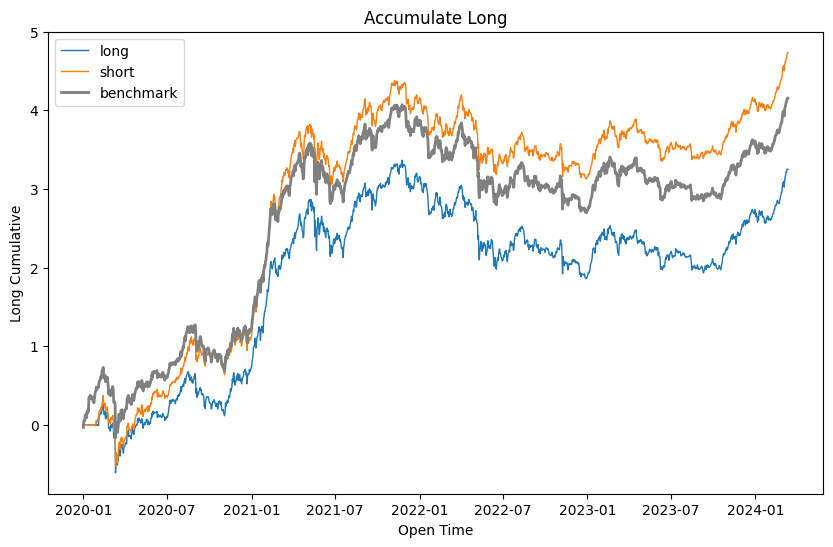

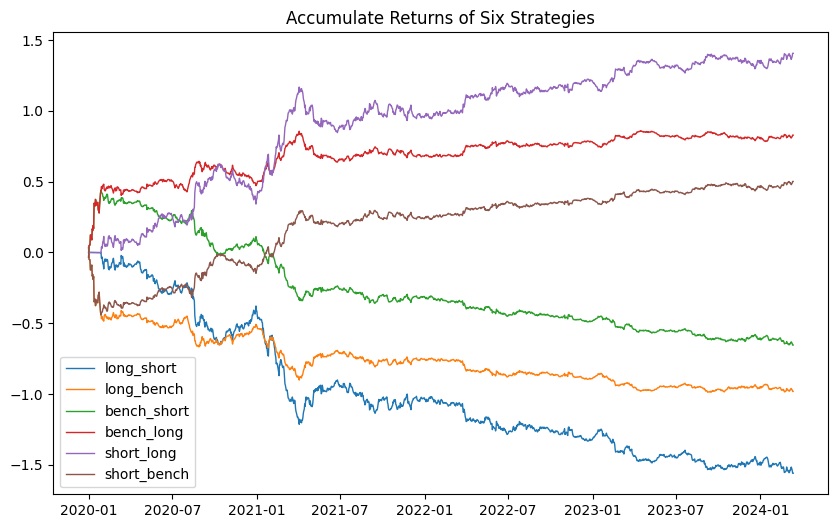

long: 
ann_return = 18.5734  sharpe = 4.0975  maxdd = 0.6907  calmar_ratio = 26.8919  

short: 
ann_return = 27.0459  sharpe = 5.9819  maxdd = 0.6573  calmar_ratio = 41.149  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = -8.9105  sharpe = -7.0437  maxdd = 1.5587  calmar_ratio = -5.7165  

long_bench: 
ann_return = -5.6094  sharpe = -6.1311  maxdd = 0.9873  calmar_ratio = -5.6815  

bench_long: 
ann_return = 4.7334  sharpe = 5.1736  maxdd = 0.1176  calmar_ratio = 40.2667  

short_long: 
ann_return = 8.0345  sharpe = 6.3513  maxdd = 0.1736  calmar_ratio = 46.2882  

short_bench: 
ann_return = 2.8631  sharpe = 3.038  maxdd = 0.46  calmar_ratio = 6.2241  

bench_short: 
ann_return = -3.7391  sharpe = -3.9675  maxdd = 0.7598  calmar_ratio = -4.9214  



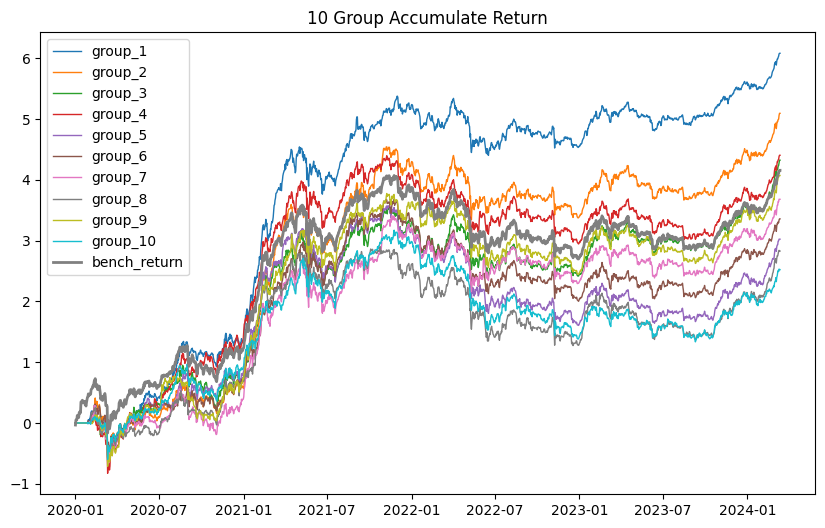

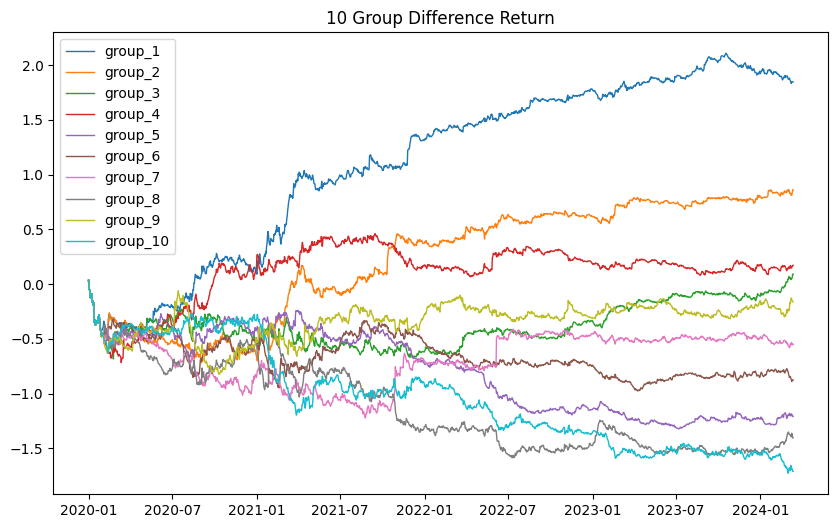

group_1: 
ann_return = 34.7446  sharpe = 7.7519  maxdd = 0.6603  calmar_ratio = 52.6174  

group_2: 
ann_return = 29.1029  sharpe = 6.0343  maxdd = 0.6844  calmar_ratio = 42.5233  

group_3: 
ann_return = 24.7005  sharpe = 5.2548  maxdd = 0.6573  calmar_ratio = 37.5771  

group_4: 
ann_return = 25.1603  sharpe = 5.3201  maxdd = 0.8433  calmar_ratio = 29.8366  

group_5: 
ann_return = 17.2716  sharpe = 3.6496  maxdd = 0.6827  calmar_ratio = 25.2996  

group_6: 
ann_return = 19.184  sharpe = 3.943  maxdd = 0.6716  calmar_ratio = 28.5654  

group_7: 
ann_return = 21.0208  sharpe = 4.3124  maxdd = 0.7525  calmar_ratio = 27.9343  

group_8: 
ann_return = 16.1541  sharpe = 3.3444  maxdd = 0.7048  calmar_ratio = 22.9208  

group_9: 
ann_return = 23.2591  sharpe = 4.7773  maxdd = 0.7455  calmar_ratio = 31.1983  

group_10: 
ann_return = 14.4078  sharpe = 3.2453  maxdd = 0.6339  calmar_ratio = 22.7301  

-----------------------------------------
group_difference_1: 
ann_return = 10.5617  sharpe

In [3]:
from factor_analysis.factor_analysis import FactorAnalysis

factors = df.select(['open_time', 'symbol', 'mean_diff_ratio_perday'])

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()